# Question 1

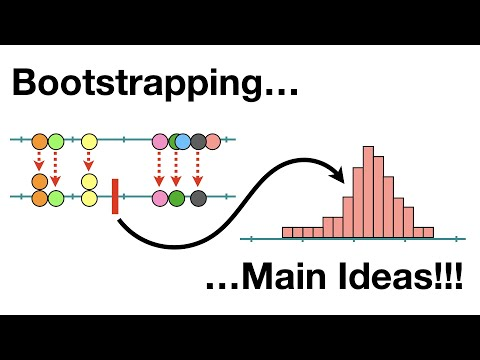

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The standard error of the mean compares a sample of the mean with the overall population mean and measures how far this sample data is likely to be from the population mean. Meanwhile, the standard deviation examines individual data values for variability and dispersion between it and the mean. The standard error of the mean will always be smaller than the standard deviation as it's calculated by taking the standard deviation and dividing it by the square root of the sample size.

Reference link (found this to be more helpful than ChatGPT): https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp

# Question 6

1. Buddy, the process of bootstrapping is very simple when you think of it like this: you have a sample of data, maybe it was collected by you or from elsewhere. Rather than collecting more data samples to gain a better understanding of the data, you would simply "simulate" results by taking resamplings of that same sample of data. The key term that we would use for this process is the idea of "sampling with replacement", and what this essentailly means is that you're taking random samples of data from this data sample, and putting it back into the population before taking another random sample. When you repeat this process many times, you'll be able to carefully analyze these newly resampled datasets, providing a better sense of the variability of the data without the need to collect any more.

2. Bootstrapping's main purpose is all about estimation, man. Essentially the goal here is to estimate any uncertanties we have about any statistic (such as the mean or median). We want to use this because we often aren't aware about exact distributions in our population, so rather than trying to figure these things out using theories and guesswork, we can bootstrap with our data instead!

3. Well, man, let's use coffee intake as our example here, since I know how much you enjoy caffeine. Let's say you assume that coffee drinkers drink an average of 3 cups a day. Now let's assume you pull 50 people from a population of coffee drinkers, and their coffee intake average is 2.8 cups/day. Bootstrapping can help you determine whether your guess was a plausible one, as you can take lots of resamplings (with replacement of persons) from the 50 person sample, and calculate the average of these resamplings. If you do this a certain amount of times you'll be able to generate a bootstrap distribution of these sample means, which you can compare with the hypothesized guess of 3 cups to see if such a guess was intuitive. Pretty cool, right?  

ChatBot link: https://chatgpt.com/share/66ff4092-76d4-8012-bb3b-2aa2adc9e4da

# Question 8

Introduction: Our goal is to determine whether or not the new vaccine implemented by AliTech is effective.

Null Hypothesis: In this context, a null hypothesis would refer to the vaccine having no effect, due to there being little to no difference between the InitialHealthScore and the FinalHealthScore average. However, the goal here is to find significant improvements in health scores after vaccination.

Initial Data Visualization:

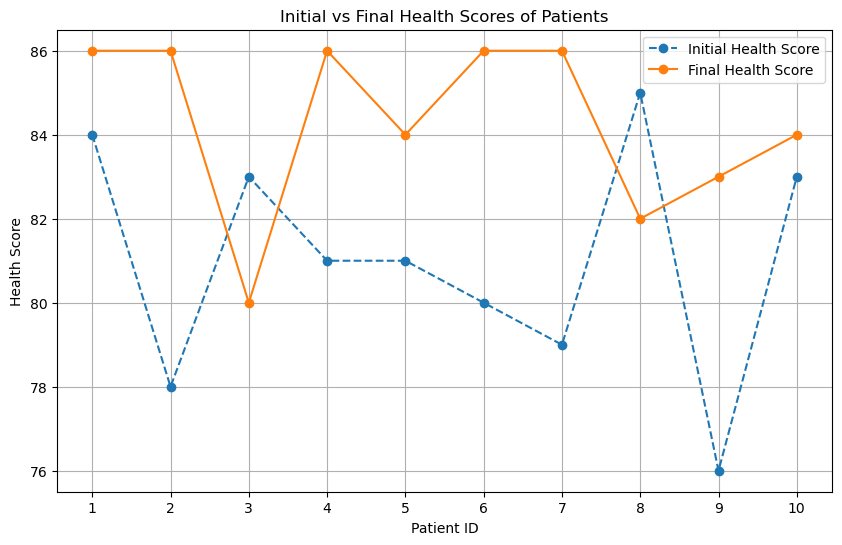

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the dataset from the CSV data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot InitialHealthScore and FinalHealthScore for each patient
plt.figure(figsize=(10, 6))
plt.plot(df['PatientID'], df['InitialHealthScore'], marker='o', label='Initial Health Score', linestyle='--')
plt.plot(df['PatientID'], df['FinalHealthScore'], marker='o', label='Final Health Score', linestyle='-')

plt.title('Initial vs Final Health Scores of Patients')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.xticks(df['PatientID'])
plt.legend()
plt.grid(True)
plt.show()

Bootstrapping Distribution:

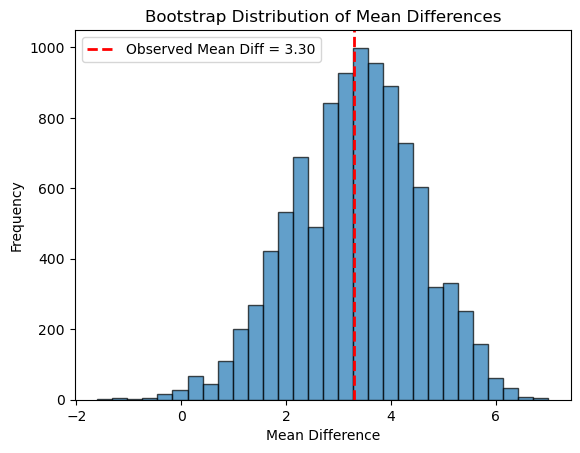

P-value: 0.5344


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Create the dataset from the CSV data (you'll load from the CSV file)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between FinalHealthScore and InitialHealthScore
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Observed mean difference
observed_mean_diff = df['ScoreDifference'].mean()

# Bootstrapping to simulate the null hypothesis (no effect)
n_iterations = 10000
bootstrap_diffs = []
for _ in range(n_iterations):
    # Resample the score differences
    bootstrap_sample = np.random.choice(df['ScoreDifference'], size=len(df), replace=True)
    bootstrap_mean_diff = np.mean(bootstrap_sample)
    bootstrap_diffs.append(bootstrap_mean_diff)

# Plot the bootstrap distribution
plt.hist(bootstrap_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_mean_diff, color='r', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff = {observed_mean_diff:.2f}')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate p-value
p_value = np.sum(np.array(bootstrap_diffs) >= observed_mean_diff) / n_iterations
print(f'P-value: {p_value:.4f}')


Findings: The p-value represents the likelihood of obtaining the data when assuming that the null hypothesis is true. The p-value for this bootstrap distribution is 0.5344. This p-value is significantly larger than the common threshold seen with p-values (0.05), indicating that the data obserevd here does not contradict the null hypothesis stated above, essentially saying that the vaccine has not had a significant effect. We can assume that the null hypothesis of "no effect" is accurate.

ChatBot link: https://chatgpt.com/share/66ff0b58-19c4-8012-8041-fc0084f8000a

# Question 9

Yes